# Channel Package: Example
## Use of the channel class to simulate a laser pulse
### Other Features Demonstration
* Channels time series generation
* Channels function manipulaltion
* Channel fitting 
* Automatic prefix scaling in plots

In [1]:
import numpy as np
from channel import Channel
import channel.generator as gen
from jumble.units_prefixed import ms, nW, uW
import jumble.measurement as me
import figs

### Parameters

In [2]:
T       = 10*ms   # simulation time
dt      = 0.01*ms # sampling time step
t0      = 0.0     # inital time
t1      = 3*ms    # peak time position
sigma_t = 0.1*ms  # peak with
sigma_P = 0.1*uW  # gaussian random noise std
x0      = 2.0*uW  # peak height 

### Create a Noisy Channel With a Gaussian Shaped Pulse

In [3]:
P_noise  = gen.random_normal(T=T, dt=dt, t0=t0,
                             sigma        = sigma_P, 
                             names        = ['time' , 'power_out'],
                             unitss       = ['s','W'],
                             descriptions = ["elapsed time", "Output power"],
                             symbols      = ["t", "P_{out}"])

P_peak = gen.gaussian_peak(T=T, dt=dt, t0=t0,
                            t1=t1,sigma_t=sigma_t,x0=x0)

P_out =  P_noise + P_peak
P_out += np.abs(P_out.min())
P_out

Channel power_out, type constant sampling, @ 0x1dc7515f7c0
  name              : power_out [W], Output power
  xname             : time [s], elapsed time
  step Min, Avg, Max: 10 μs, 10 μs, 10 μs
  start stop        : (0 s, 9.99 ms)
  number of samples : 1000
  channel type      : constant sampling

### Time Series Visualization

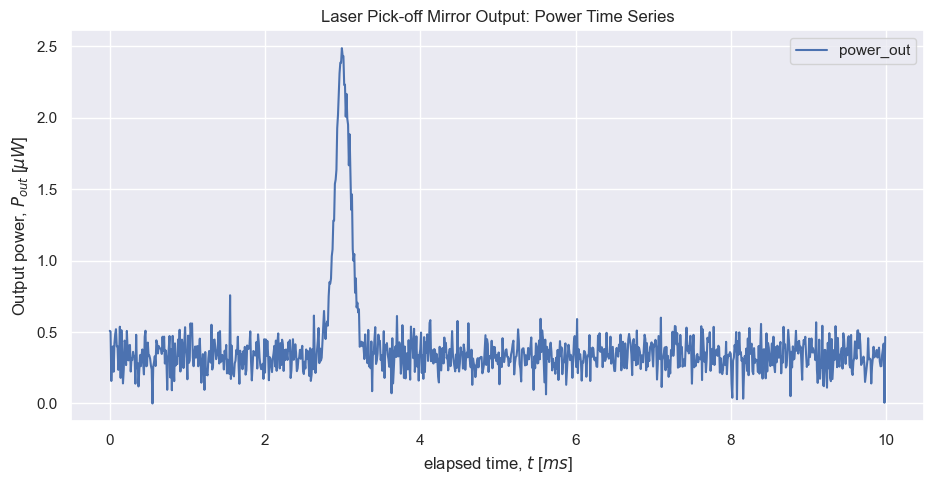

In [4]:
_ = P_out.plot(title="Laser Pick-off Mirror Output: Power Time Series")

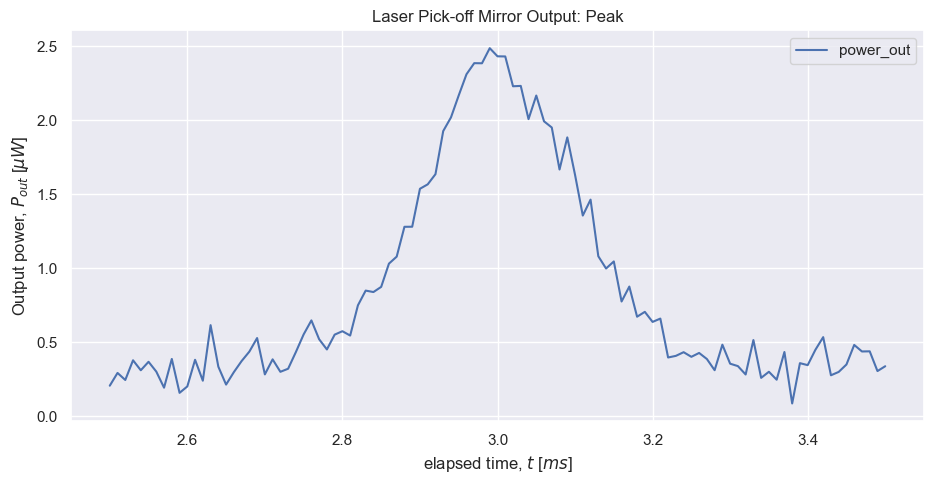

In [5]:
_= P_out[2.5*ms:3.5*ms].plot(title="Laser Pick-off Mirror Output: Peak")


### Peak Energy

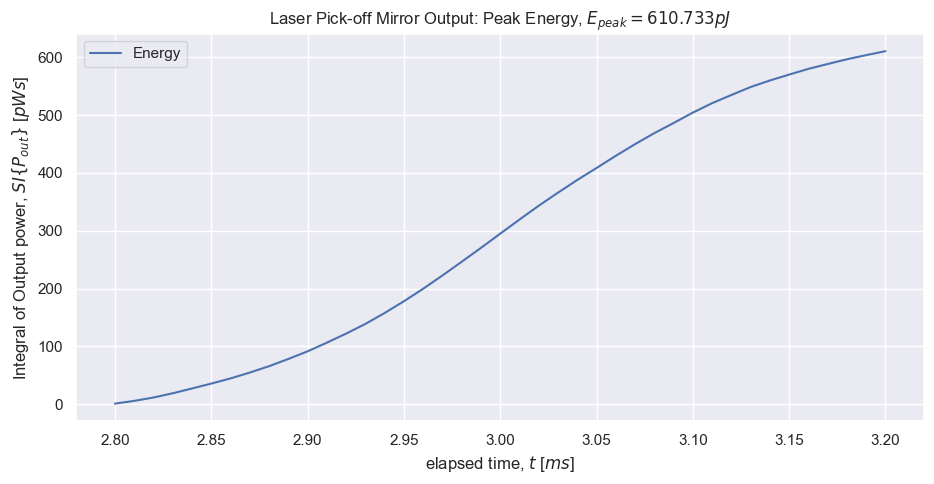

In [6]:
E_peak       = P_out[2.8*ms:3.2*ms].integrate_simpson()
#E_peak.units = "J"
E_peak.names = ["time", "Energy"]
E_measure    = me.string("E_{peak}", E_peak.max(), units="J", latex_string=True)
_= E_peak.plot(title="Laser Pick-off Mirror Output: Peak Energy, %s" % E_measure)


### Power Peak Fit Showing Clear Systematic in Residual Plot

Initial fit parameters:
    μ = 0.00299
    σ = 0.000333333
    y0 = 2.48546·10^-06
    y1 = 2.48546·10^-18

curve_fit: final fit parameters:
    μ = 0.00300132
    σ = 0.000129607
    y0 = 2.20996·10^-06
    y1 = 2.48546·10^-18



D:\opt\python\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


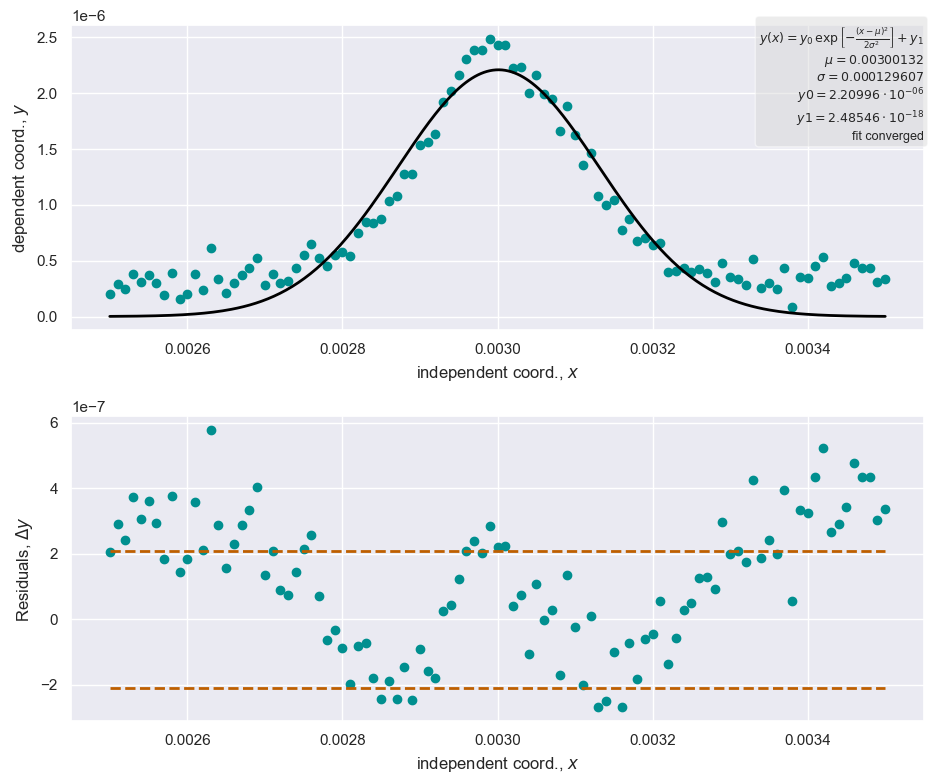

In [7]:
fit = P_out[2.5*ms:3.5*ms].fit("FitGaussian")
_= fit.plot()

### Power Peak Fit Showing Systematic in Residual Plot Removed

Initial fit parameters:
    μ = 0.00299
    σ = 0.000333333
    y0 = 2.1496·10^-06
    y1 = 2.1496·10^-18

curve_fit: final fit parameters:
    μ = 0.00300147
    σ = 9.64265·10^-05
    y0 = 2.04329·10^-06
    y1 = 6.38063·10^-09



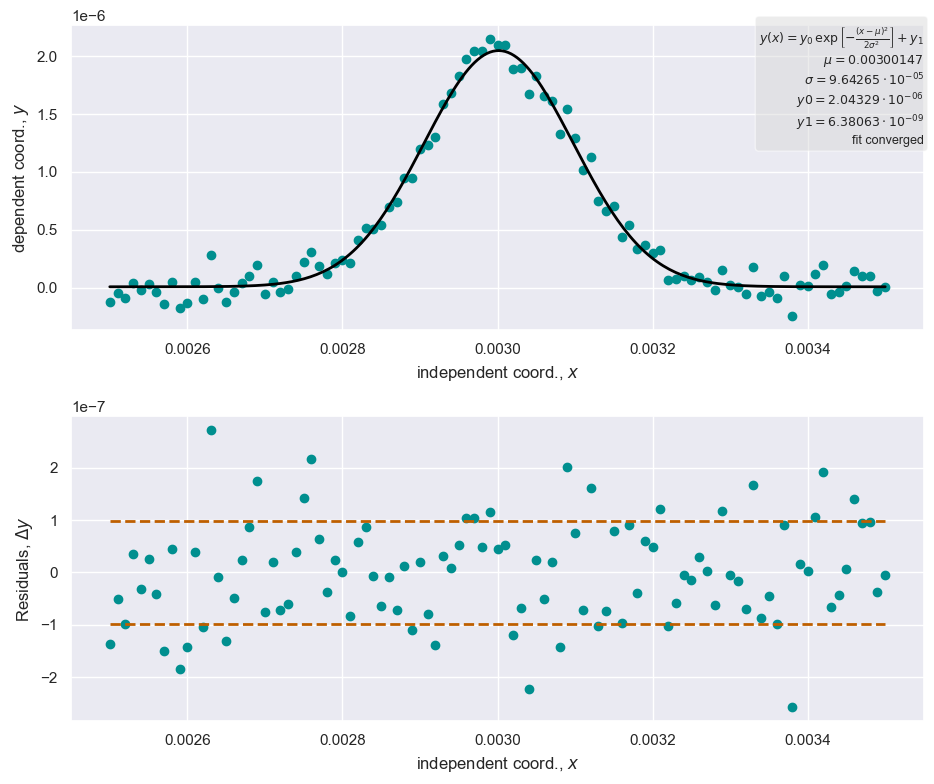

In [8]:
P_fit = P_out[2.5*ms:3.5*ms] - P_out[4.0*ms:].mean()

fit   = P_fit.fit("FitGaussian")

_ = fit.plot()